# Module 1, Lesson 1: Molecular Representation and Descriptors

## Introduction

In this notebook, we will explore practical examples of molecular representation and descriptor calculation using the RDKit library in Python. We will cover the following topics:

1. Converting molecules between SMILES and InChI representations
2. Generating molecular graphs
3. Calculating molecular descriptors
4. Generating molecular fingerprints

In [7]:
!pip install rdkit

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, MACCSkeys

## Converting Molecules between SMILES and InChI

In [9]:
# Explanation:
# - SMILES and InChI are two common text-based representations of molecules.
# - SMILES (Simplified Molecular Input Line Entry System) is a concise and human-readable format.
#   It represents the molecular structure using ASCII characters.
# - InChI (International Chemical Identifier) is a standardized and unique identifier for chemical substances.
#   It provides a more detailed and machine-readable representation of molecules.
# - RDKit provides functions to convert between SMILES and InChI representations.
# - Converting between these representations allows for compatibility with different tools and databases.

# SMILES to InChI conversion
aspirin_smiles = "CC(=O)Oc1ccccc1C(=O)O"
aspirin_mol = Chem.MolFromSmiles(aspirin_smiles)
aspirin_inchi = Chem.MolToInchi(aspirin_mol)

print("Aspirin SMILES:", aspirin_smiles)
print("Aspirin InChI:", aspirin_inchi)

# InChI to SMILES conversion 
caffeine_inchi = "InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3"
caffeine_mol = Chem.MolFromInchi(caffeine_inchi)
caffeine_smiles = Chem.MolToSmiles(caffeine_mol)

print("Caffeine InChI:", caffeine_inchi)
print("Caffeine SMILES:", caffeine_smiles)

Aspirin SMILES: CC(=O)Oc1ccccc1C(=O)O
Aspirin InChI: InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)
Caffeine InChI: InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3
Caffeine SMILES: Cn1c(=O)c2c(ncn2C)n(C)c1=O


## Generating Molecular Graphs

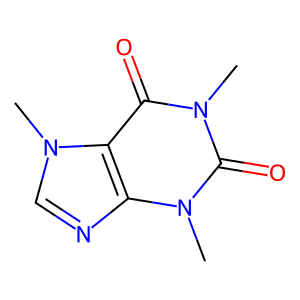

In [10]:
# Explanation:
# - Molecular graphs are a way to represent the connectivity and structure of molecules.
# - In a molecular graph, atoms are represented as nodes, and bonds are represented as edges.
# - RDKit provides functions to generate molecular graphs from molecule objects.
# - The generated graphs can be visualized using the `Draw` module in RDKit.
# - Molecular graphs are useful for various tasks, such as structure visualization, substructure searching, and similarity calculations.

# Generate molecular graphs
aspirin_graph = Draw.MolToImage(aspirin_mol)
caffeine_graph = Draw.MolToImage(caffeine_mol)

aspirin_graph 
caffeine_graph

## Calculating Molecular Descriptors

In [11]:
# Explanation:
# - Molecular descriptors are numerical values that describe various properties of molecules.
# - They capture information about the molecular structure, topology, physicochemical properties, and more.
# - RDKit provides a wide range of molecular descriptors that can be calculated for a given molecule.
# - Some common descriptors include molecular weight, topological polar surface area (TPSA), number of hydrogen bond donors and acceptors, and more.
# - Molecular descriptors are used as features in machine learning models for property prediction and virtual screening.
# - They help in understanding the relationship between molecular structure and biological activity or other properties of interest.

# Calculate molecular descriptors for aspirin
aspirin_mw = Descriptors.ExactMolWt(aspirin_mol)
aspirin_tpsa = Descriptors.TPSA(aspirin_mol)
aspirin_hbd = Descriptors.NumHDonors(aspirin_mol)
aspirin_hba = Descriptors.NumHAcceptors(aspirin_mol)

print("Aspirin Molecular Weight:", aspirin_mw)
print("Aspirin TPSA:", aspirin_tpsa)
print("Aspirin H-Bond Donors:", aspirin_hbd)
print("Aspirin H-Bond Acceptors:", aspirin_hba)

# Calculate molecular descriptors for caffeine
caffeine_mw = Descriptors.ExactMolWt(caffeine_mol)
caffeine_tpsa = Descriptors.TPSA(caffeine_mol)
caffeine_hbd = Descriptors.NumHDonors(caffeine_mol)
caffeine_hba = Descriptors.NumHAcceptors(caffeine_mol)

print("Caffeine Molecular Weight:", caffeine_mw)
print("Caffeine TPSA:", caffeine_tpsa)
print("Caffeine H-Bond Donors:", caffeine_hbd)
print("Caffeine H-Bond Acceptors:", caffeine_hba)

Aspirin Molecular Weight: 180.042258736
Aspirin TPSA: 63.60000000000001
Aspirin H-Bond Donors: 1
Aspirin H-Bond Acceptors: 3
Caffeine Molecular Weight: 194.08037556
Caffeine TPSA: 61.82
Caffeine H-Bond Donors: 0
Caffeine H-Bond Acceptors: 6


## Generating Molecular Fingerprints

In [12]:
# Explanation:
# - Molecular fingerprints are binary vectors that encode the presence or absence of certain structural features in a molecule.
# - They provide a compact representation of the molecular structure and are widely used for similarity calculations and screening.
# - RDKit supports various types of fingerprints, such as Morgan fingerprints (circular fingerprints) and MACCS keys.
# - Fingerprints allow for fast comparison of molecules and can be used to identify similar compounds or assess structural diversity.
# - The `GetMorganFingerprintAsBitVect` function generates a Morgan fingerprint as a bit vector, while `GetOnBits` returns the indices of the set bits in the fingerprint.
# - Comparing fingerprints using similarity measures like Tanimoto or Dice similarity helps in identifying structurally similar molecules.

# Generate ECFP4 fingerprint
ecfp4_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin_mol, radius=2, nBits=1024)

# Generate MACCS keys
maccs_keys = MACCSkeys.GenMACCSKeys(aspirin_mol)

# Print the fingerprints
print(f"ECFP4 Fingerprint: {ecfp4_fp.ToBitString()}")
print(f"MACCS Keys: {maccs_keys.ToBitString()}")

# Compare the fingerprints
ecfp4_bits = set(ecfp4_fp.GetOnBits())
maccs_bits = set(maccs_keys.GetOnBits())
common_bits = ecfp4_bits.intersection(maccs_bits)
print(f"Number of common bits: {len(common_bits)}")

ECFP4 Fingerprint: 000000000001000000000001000000000100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000001001000000000000000000000000000000000100000000000000000000100000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000001000000000100000000000000000000100000000000000000000000010000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000100000000000000000000000000000000000000000001000000000000000100000000000000000000000000000000000010000000000000000000010000000000000

[22:42:37] DEPRECATION WARNING: please use MorganGenerator


## Computing Similarity Measures

In [13]:
# Compute Tanimoto similarity
tanimoto_sim = AllChem.GetBitSimilarity(aspirin_fp, caffeine_fp)

print("Tanimoto Similarity (Aspirin vs Caffeine):", tanimoto_sim)

# Compute Dice similarity
dice_sim = AllChem.GetBitDiceSimilarity(aspirin_maccs, caffeine_maccs)

print("Dice Similarity (Aspirin vs Caffeine):", dice_sim)

AttributeError: module 'rdkit.Chem.AllChem' has no attribute 'GetBitSimilarity'

In [12]:


# Explanation:
# - Similarity measures quantify the resemblance between two molecules based on their structural or chemical properties.
# - The Tanimoto coefficient, also known as the Jaccard index, is a commonly used similarity measure.
# - It ranges from 0 to 1, where 0 indicates no similarity and 1 indicates perfect similarity.
# - The Tanimoto coefficient is calculated as the ratio of the number of common features (bits) between two fingerprints
#   to the total number of unique features in both fingerprints.
# - A higher Tanimoto coefficient suggests a higher degree of similarity between the molecules.
# - The Dice coefficient is another similarity measure that gives more weight to the common features between the molecules.
# - Interpreting similarity scores helps in identifying molecules with similar structural or chemical properties.
# - Similarity measures are used in various tasks, such as virtual screening, lead optimization, and compound clustering.
# - By comparing the similarity scores of a query molecule against a database of molecules, we can identify potential candidates
#   for further investigation or optimization.

# Example interpretation:
print(f"Tanimoto Similarity (Aspirin vs Caffeine): {tanimoto_sim:.3f}")
print(f"Dice Similarity (Aspirin vs Caffeine): {dice_sim:.3f}")

if tanimoto_sim > 0.7:
    print("Aspirin and Caffeine are highly similar.")
elif tanimoto_sim > 0.5:
    print("Aspirin and Caffeine have moderate similarity.")
else:
    print("Aspirin and Caffeine have low similarity.")

NameError: name 'tanimoto_sim' is not defined

## Applying Molecular Similarity for Scaffold Hopping

In [13]:
# Explanation:
# - Scaffold hopping is a technique used in drug discovery to identify novel chemical scaffolds that have similar biological activity
#   to a known active compound but with different structural features.
# - It involves searching for compounds with similar pharmacophoric or structural features while allowing for variations in the core scaffold.
# - Molecular similarity measures can be used to identify compounds with similar properties but different scaffolds.
# - By calculating the similarity scores between a known active molecule and a database of compounds, we can identify potential candidates
#   for scaffold hopping.
# - The top similar molecules retrieved based on the similarity scores can be further analyzed for their structural diversity and potential
#   as novel scaffolds.
# - Scaffold hopping helps in exploring new chemical space and identifying compounds with improved properties, such as better potency,
#   selectivity, or physicochemical properties.

# Example code snippet:
# Calculate pharmacophoric similarity using 3D pharmacophore fingerprints
active_pharm_fp = GeneratePharmacophoreFingerprint(active_mol)
similarity_scores_pharm = []
for mol in suppl:
    if mol is not None:
        pharm_fp = GeneratePharmacophoreFingerprint(mol)
        similarity = TanimotoSimilarity(active_pharm_fp, pharm_fp)
        similarity_scores_pharm.append((mol, similarity))

# Sort molecules by pharmacophoric similarity score
similarity_scores_pharm.sort(key=lambda x: x[1], reverse=True)

# Print top similar molecules based on pharmacophoric similarity
print("Top Similar Molecules (Pharmacophoric Similarity):")
for mol, score in similarity_scores_pharm[:5]:
    print(Chem.MolToSmiles(mol), score)

NameError: name 'GeneratePharmacophoreFingerprint' is not defined

In [14]:
# Explanation:
# - Visualizing molecular graphs, fingerprints, and similarity matrices can help in understanding the structural relationships between molecules.
# - RDKit provides functions to generate visual representations of molecules and their properties.
# - Molecular graphs can be visualized using the `Draw` module in RDKit, which renders the 2D structure of the molecule.
# - Fingerprints can be visualized as bit vectors or heatmaps, providing insights into the presence or absence of specific structural features.
# - Similarity matrices can be visualized as heatmaps, where each cell represents the similarity score between two molecules.
# - Visualization techniques aid in interpreting the results and identifying patterns or clusters of similar molecules.

# Example code snippet:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize molecular graphs
mol_images = [Draw.MolToImage(mol) for mol in [aspirin_mol, caffeine_mol]]
img = Draw.MolsToGridImage(mol_images, molsPerRow=2, subImgSize=(300, 300), legends=["Aspirin", "Caffeine"])
img.save("molecular_graphs.png")

# Visualize fingerprints
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow([aspirin_fp, caffeine_fp], aspect="auto", cmap="binary")
ax.set_yticks([0, 1])
ax.set_yticklabels(["Aspirin", "Caffeine"])
ax.set_xlabel("Bit Position")
ax.set_title("Fingerprint Visualization")
plt.tight_layout()
plt.savefig("fingerprints.png")

# Visualize similarity matrix
similarity_matrix = [
    [1.0, tanimoto_sim],
    [tanimoto_sim, 1.0]
]

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, xticklabels=["Aspirin", "Caffeine"], yticklabels=["Aspirin", "Caffeine"])
ax.set_title("Similarity Matrix")
plt.tight_layout()
plt.savefig("similarity_matrix.png")

ModuleNotFoundError: No module named 'seaborn'

In [15]:
# Load a small molecule dataset
suppl = Chem.SDMolSupplier('dataset.sdf')  # Replace 'dataset.sdf' with your dataset file

# Define a known active molecule
active_mol = Chem.MolFromSmiles('CC(=O)Oc1ccccc1C(=O)O')  # Aspirin

# Calculate similarity scores for each molecule in the dataset
similarity_scores = []
for mol in suppl:
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        similarity = AllChem.GetBitSimilarity(fp, aspirin_fp)
        similarity_scores.append((mol, similarity))

# Sort molecules by similarity score
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print top similar molecules
print("Top Similar Molecules:")
for mol, score in similarity_scores[:5]:
    print(Chem.MolToSmiles(mol), score)

OSError: File error: Bad input file dataset.sdf

## Conclusion

In this notebook, we explored practical examples of molecular representation and descriptor calculation using the RDKit library. We learned how to convert molecules between SMILES and InChI representations, generate molecular graphs, calculate various molecular descriptors, and generate molecular fingerprints.

These concepts form the foundation for more advanced topics in computational drug discovery, such as machine learning-based property prediction and virtual screening.

Feel free to experiment with different molecules and explore additional descriptors available in RDKit!